![](https://i0.wp.com/wptavern.com/wp-content/uploads/2016/07/stack-overflow.png?ssl=1)

<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Stackoverflow Part 1: Cleaning</strong></h1>

### <b>Author: Nguyen Dang Huynh Chau</b>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Introduction](#1.1)

1.2 [Importing Necessary Libraries and datasets](#1.2)

1.3 [Data Retrieving](#1.3)

1.4 [Data Information](#1.4)

<br>

### 2. [Data Cleaning](#2)

2.1 [Data Types](#2.1)

2.1.1 [Reformat the values](#2.1.1)

2.1.2 [Change the data type](#2.1.2)

2.2 [Drop columns](#2.2)

2.3 [Check Typo](#2.3)

2.4 [Missing Values](#2.4)  

2.4.1 [Check missing values](#2.1.1)

2.4.2 [Fill missing values](#2.1.2)

2.5 [Extra-whitespaces](#2.5)

2.6 [Upper Case the content](#2.6)

2.7 [Sanity Checks](#2.7)

2.7.1 [Check the "YearsCode" column with the "Age" column](#2.7.1)

2.7.2 [Check the "YearsCode" column with the "Age" column](#2.7.2)

2.7.3 [Check columns "Age1stCode", and "Age"](#2.7.3)

2.7.4 [Check column "MainBranch" and "YearsCode"](#2.7.4)

2.7.5 [Drop the CompTotal](#2.7.5)

2.8 [Checking for Impossible values & Outliers](#2.8)

2.8.1 [Detect Outliers with Boxplot](#2.8.1)

2.8.2 [Dealing with Impossible values & Outliers](#2.8.2)

2.9 [Save the Intermediate data](#2.11)

<br>

### 3. [Data Exploration (EDA)](#3)

***In StackOverFlowEDA Notebooks***

<br>

### 4. [Conculsions](#6)
***In StackOverFlowEDA Notebooks***

<br>

### 5. [References](#7)
***In StackOverFlowEDA Notebooks***

<br>

### 6. [Appendix](#8)
***In StackOverFlowEDA Notebooks***

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>✍️ 1. Data Preparation</strong></h1>

<p> In this report, the data analysise and visualisation the Stack Overflow Developer Survey Results 2021 dataset. In order to have an accurate result, data prepration step must be done precisely. First of all, data from the csv file which is named "survey_results_public.csv" is loaded by "read_csv" in pandas function. After that, all the data types must be checked to ensure no column has incorrect data types assigned. Having been checked the data types, the loaded data is cleaned by 6 steps which are typos, extra-whitespaces, upper/lower-case, sanity checks, missing values, and categorical data </p>

<a id="1.1"></a>
# ✴️ 1.1 Introduction
***
Stack Overflow is the largest, most trusted online community for developers to learn, share their knowledge, and build their careers. More than 50 million professional and aspiring programmers visit Stack Overflow each month to help solve coding problems, develop new skills, and find job opportunities. Stack Overflow partners with businesses to help them understand, hire, engage, and enable the world's developers. Our products and services focus on developer marketing, technical recruiting, market research, and enterprise knowledge sharing. Learn more about our business solutions here.

Each year, Stack Overflow ask the developer community about everything from their favorite technologies to their job preferences. This year marks the eighth year they’ve published their Annual Developer Survey results—with the largest number of respondents yet. Over 100,000 developers took the 30-minute survey in January 2018.

This year, Stack Overflow covered a few new topics ranging from artificial intelligence to ethics in coding. They also found that underrepresented groups in tech responded to our survey at even lower rates than they would expect from their participation in the workforce. We are going to dive into the results ourselves and see what we can learn about salaries or machine learning or diversity in tech?

<a id="1.2"></a>
# 📬 1.2 Importing Necessary Libraries and datasets

In [1]:
# import libraries which are pandas and numpy
import pandas as pd
import numpy as np
# label encoder for plots
import matplotlib.pyplot as plt

#Libraries for plotting
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import missingno as msno
sns.set_theme(style="ticks", color_codes=True) #set theme in seaborn
!pip install plotly
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px


#Libraries for money converter
import requests
from tkinter import *
import tkinter as tk
from tkinter import ttk

# scatter matrix library
from pandas.plotting import scatter_matrix

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.20.1
Pandas version:  1.2.4
Python 3.9.7


<a id="1.3"></a>
# 📲 1.3 Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

In [3]:
## Importing the datasets
df = pd.read_csv("Data/survey_results_public.csv", delimiter='|', skipinitialspace = True)

df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

#set to show all columns
pd.set_option('display.max_columns', None)

#Replace extra-whitspaces with regex by using function replace in pandas
df = df.replace({"^\s*|\s*$":""}, regex=True)  

#strip the extra-whitespaces out for columns
df.columns = df.columns.str.replace(' ', '') 

# drop Unnamed, it is just a number given to identify each house
df.head(3)

The shape of the ORGINAL data is (row, column): (83439, 48)


,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN


<a id="1.4"></a>
# 🔈 1.4 Data Information

In [4]:
print ("The shape of the train data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the train data is (row, column):(83439, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  Org

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 Data types
***
Since there may be some of the data use inappropriate data types, which may effect the data set later. Moreover, the different data types have different check. For example, the catergorical data is checked the typo, while the numerical data have the sanity check. The data type is checked with dtypes function in pandas.

In [5]:
df.dtypes #check types of all columns

ResponseId                        int64
MainBranch                       object
Employment                       object
Country                          object
US_State                         object
UK_Country                       object
EdLevel                          object
Age1stCode                       object
LearnCode                        object
YearsCode                        object
YearsCodePro                     object
DevType                          object
OrgSize                          object
Currency                         object
CompTotal                        object
CompFreq                         object
LanguageHaveWorkedWith           object
LanguageWantToWorkWith           object
DatabaseHaveWorkedWith           object
DatabaseWantToWorkWith           object
PlatformHaveWorkedWith           object
PlatformWantToWorkWith           object
WebframeHaveWorkedWith           object
WebframeWantToWorkWith           object
MiscTechHaveWorkedWith           object


### ------> OBSERVATION
****
Since some of the columns in that table do not have the appropriate data types assigned, so that they all need to be changed with a new appropriate data type. In the "YearsCode", "YearsCodePro" and "CompTotal" columns replace the string "Less than 1 year" with "0", "More than 50 years with "51" and "CompTotal" with "200000.0" in order to change the data type to the more appropriate one.

<a id="2.2.1"></a>
## 🛠 2.1.1 Reformat the values:

In [6]:
# YearsCode
df["YearsCode"]= df["YearsCode"].replace("Less than 1 year", "0")
df["YearsCode"]= df["YearsCode"].replace("More than 50 years", "51")

# YearsCodePro
df["YearsCodePro"]= df["YearsCodePro"].replace("Less than 1 year", "0")
df["YearsCodePro"]= df["YearsCodePro"].replace("More than 50 years", "51")

# CompTotal
df["CompTotal"]= df["CompTotal"].replace("200,000.0", "200000.0")

<a id="2.2.2"></a>
## ✔️ 2.1.2 Change the data type:

In [7]:
df['MainBranch'] = df['MainBranch'].astype('string')
df['Employment'] = df['Employment'].astype('string')
df['Country'] = df['Country'].astype('string')
df['US_State'] = df['US_State'].astype('string')
df['UK_Country'] = df['UK_Country'].astype('string')
df['EdLevel'] = df['EdLevel'].astype('string')
df['Age1stCode'] = df['Age1stCode'].astype('string')
df['LearnCode'] = df['LearnCode'].astype('string')
df['DevType'] = df['DevType'].astype('string')
df['Currency'] = df['Currency'].astype('string')
df['CompFreq'] = df['CompFreq'].astype('string')
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].astype('string')
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].astype('string')
df['DatabaseHaveWorkedWith'] = df['DatabaseHaveWorkedWith'].astype('string')
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].astype('string')
df['PlatformHaveWorkedWith'] = df['PlatformHaveWorkedWith'].astype('string')
df['PlatformWantToWorkWith'] = df['PlatformWantToWorkWith'].astype('string')
df['WebframeHaveWorkedWith'] = df['WebframeHaveWorkedWith'].astype('string')
df['WebframeWantToWorkWith'] = df['WebframeWantToWorkWith'].astype('string')
df['MiscTechHaveWorkedWith'] = df['MiscTechHaveWorkedWith'].astype('string')
df['MiscTechWantToWorkWith'] = df['MiscTechWantToWorkWith'].astype('string')
df['ToolsTechHaveWorkedWith'] = df['ToolsTechHaveWorkedWith'].astype('string')
df['ToolsTechWantToWorkWith'] = df['ToolsTechWantToWorkWith'].astype('string')
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].astype('string')
df['NEWCollabToolsWantToWorkWith'] = df['NEWCollabToolsWantToWorkWith'].astype('string')
df['OpSys'] = df['OpSys'].astype('string')
df['NEWStuck'] = df['NEWStuck'].astype('string')
df['NEWSOSites'] = df['NEWSOSites'].astype('string')
df['NEWOtherComms'] = df['NEWOtherComms'].astype('string')
df['Gender'] = df['Gender'].astype('string')
df['Trans'] = df['Trans'].astype('string')
df['Sexuality'] = df['Sexuality'].astype('string')
df['Ethnicity'] = df['Ethnicity'].astype('string')
df['Accessibility'] = df['Accessibility'].astype('string')
df['MentalHealth'] = df['MentalHealth'].astype('string')
df['SOAccount'] = df['SOAccount'].astype('string')
df['SOPartFreq'] = df['SOPartFreq'].astype('string')
df['SurveyLength'] = df['SurveyLength'].astype('string')
df['SurveyEase'] = df['SurveyEase'].astype('string')
df['SOVisitFreq'] = df['SOVisitFreq'].astype('string')
df['CompTotal'] = df['CompTotal'].astype('float')
df['OrgSize'] = df['OrgSize'].astype('string')
df['Age'] = df['Age'].astype('string')  #age is string since the values of it is a range of age.
df['YearsCode'] = df['YearsCode'].astype('float') 
df['YearsCodePro'] = df['YearsCodePro'].astype('float')
df['SOComm'] = df['SOComm'].astype('string')

<a id="2.2"></a>
# ❌ 2.2 Drop columns:
****
Since there are a lot of unnecessary columns in this data set, so I desire to drop them.

In [8]:
df = df.drop(columns=['ResponseId', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility', 'MentalHealth', 
                      'SurveyLength', 'OrgSize', 'SurveyEase', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
                      'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 
                      'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
                      'MiscTechWantToWorkWith', 'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith',
                      'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
                      'OpSys',
                     ])

<a id="2.3"></a>
# 📝 2.3 Check Typo:
***
In order to check the typo, all the categories in all the columns with value_count() functions, by counting the typo mistake can appear. For those cloumns has a long values count list, they will be shown by using a for loop in order to check carefully. Each question for each columns all are listed below for catching up with those values in or to decide if the answer is valid or not.

In [9]:
df['MainBranch'].value_counts() 
# Answer the question "Which of the following options best describes you today? Here, by ""developer""

I am a developer by profession                                                   58153
I am a student who is learning to code                                           12029
I am not primarily a developer, but I write code sometimes as part of my work     6578
I code primarily as a hobby                                                       4929
I used to be a developer by profession, but no longer am                          1237
None of these                                                                      513
Name: MainBranch, dtype: Int64

### ------> OBSERVATION
****
In the "MainBranch" column, there are 3 values that may affect the aesthetic of the plot so they will be replaced with the shorter values but have same meaning.

In [10]:
df["MainBranch"]= df["MainBranch"].replace("I am not primarily a developer, but I write code sometimes as part of my work", "Code is a part of my job")
df["MainBranch"]= df["MainBranch"].replace("I am a student who is learning to code", "Learning to code")
df["MainBranch"]= df["MainBranch"].replace("I used to be a developer by profession, but no longer am", "Not a developer anymore")

In [11]:
df['Employment'].value_counts()
#Answer the quetsion "Which of the following best describes your current employment status?"

Employed full-time                                      53584
Student, full-time                                      11781
Independent contractor, freelancer, or self-employed     8041
Not employed, but looking for work                       2961
Employed part-time                                       2461
Student, part-time                                       2051
Not employed, and not looking for work                   1228
I prefer not to say                                       890
Retired                                                   326
Name: Employment, dtype: Int64

In [12]:
categories = list(df['Country'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

United States of America
India
Germany
United Kingdom of Great Britain and Northern Ireland
Canada
France
Brazil
Poland
Netherlands
Italy
Australia
Spain
Russian Federation
Sweden
China
Turkey
Switzerland
Israel
Iran, Islamic Republic of...
Pakistan
Austria
Czech Republic
Ukraine
Bangladesh
Belgium
Mexico
Romania
Indonesia
Greece
Norway
Denmark
Argentina
South Africa
Portugal
Finland
New Zealand
Egypt
Hungary
Japan
Nigeria
Bulgaria
Sri Lanka
Ireland
Viet Nam
Philippines
Colombia
Singapore
Nepal
Malaysia
Serbia
Taiwan
Kenya
Slovakia
Croatia
Slovenia
Chile
Lithuania
Morocco
Hong Kong (S.A.R.)
South Korea
Thailand
United Arab Emirates
Belarus
Georgia
Tunisia
Peru
Uruguay
Saudi Arabia
Estonia
Bosnia and Herzegovina
Lebanon
Latvia
Venezuela, Bolivarian Republic of...
Dominican Republic
Ecuador
Armenia
Ghana
Costa Rica
Iraq
Albania
Jordan
Ethiopia
Uzbekistan
Kazakhstan
Afghanistan
Azerbaijan
Uganda
Guatemala
Cyprus
Republic of Moldova
Myanmar
Republic of Korea
The former Yugoslav Republic of

### ------> OBSERVATION
****
- The name "United Kingdom of Great Britain and Northern Ireland" is extremely long so I desire to replace it with "UK".
- Since there are no typo, however, there are two ways of displaying a country which is Vietnam. Hence, chossing 1 values and replace the other values with the replace() function is essentail. In this report, "Vietnam" is chosen since that name is more common.

In [13]:
#Replace the name "United Kingdom of Great Britain and Northern Ireland" with "UK"
df["Country"]= df["Country"].replace("United Kingdom of Great Britain and Northern Ireland", "UK")
#Replace the "Viet Nam" with "Vietnam"
df["Country"]= df["Country"].replace("Viet Nam", "Vietnam")

In [14]:
df['US_State'].value_counts()
#Answer the question "In which state or territory of the USA do you live?"

California                              2163
Texas                                   1023
New York                                 961
Washington                               932
Massachusetts                            624
Florida                                  613
Illinois                                 587
Colorado                                 549
Pennsylvania                             499
Virginia                                 453
Ohio                                     448
Utah                                     415
North Carolina                           403
Michigan                                 381
Oregon                                   375
Minnesota                                359
Georgia                                  356
Maryland                                 350
New Jersey                               347
Wisconsin                                266
Arizona                                  261
Missouri                                 230
Indiana   

In [15]:
df['UK_Country'].value_counts()
#Answer the question "In which part of the United Kingdom do you live?"

England             3915
Scotland             341
Wales                 86
Northern Ireland      76
Name: UK_Country, dtype: Int64

In [16]:
df['EdLevel'].value_counts()
#Answer the question "Which of the following best describes the highest level of formal education 
#that you’ve completed?"

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          35357
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       17512
Some college/university study without earning a degree                                10589
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9534
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2567
Primary/elementary school                                                              2479
Associate degree (A.A., A.S., etc.)                                                    2231
Something else                                                                         1601
Professional degree (JD, MD, etc.)                                                     1256
Name: EdLevel, dtype: Int64

### ------> OBSERVATION
****
In order to simplify the education level, I desire to limit the scope and drop some catergories and replace those values having the extremely long size, and focusing on: Primary school, High School, Some University (no degree), Bachelor's Degree, Master's Degree, and Doctoral Degrees.

In [17]:
#Drop categories I am not interested in. So many educational systems. Lets look a high school, some uni, bachelor's degree, masters, and phd.
df = df.drop(df.index[df['EdLevel'].isin(["Associate degree (A.A., A.S., etc.)","Professional degree (JD, MD, etc.)","Something else"])])

#Rename for simplicity, the names are way too long.
df['EdLevel'] = df['EdLevel'].replace({
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'High School', 
    'Some college/university study without earning a degree': 'Some Uni', 
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'BDeg', 
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'MDeg',
    'Other doctoral degree (Ph.D., Ed.D., etc.)':'PhD',
    'Primary/elementary school' : 'Primary school',
    })


In [18]:
df['Age1stCode'].value_counts()
#Answer the question "At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"

11 - 17 years           41618
18 - 24 years           18992
5 - 10 years            10938
25 - 34 years            3869
35 - 44 years            1184
Younger than 5 years      805
45 - 54 years             485
55 - 64 years             226
Older than 64 years        57
Name: Age1stCode, dtype: Int64

In [19]:
categories = list(df['LearnCode'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

School
Other online resources (ex: videos, blogs, etc)
Books / Physical media
School;Books / Physical media
Other online resources (ex: videos, blogs, etc);School;Books / Physical media
Other online resources (ex: videos, blogs, etc);School
Other online resources (ex: videos, blogs, etc);School;Online Courses or Certification;Books / Physical media
Other online resources (ex: videos, blogs, etc);School;Online Forum;Online Courses or Certification;Books / Physical media
Other online resources (ex: videos, blogs, etc);Books / Physical media
Other online resources (ex: videos, blogs, etc);Online Courses or Certification
Other (please specify):
Other online resources (ex: videos, blogs, etc);School;Online Courses or Certification
Other online resources (ex: videos, blogs, etc);Online Courses or Certification;Books / Physical media
Other online resources (ex: videos, blogs, etc);Online Forum
Other online resources (ex: videos, blogs, etc);Online Forum;Online Courses or Certification
Other o

### ------> OBSERVATION
****
Since this is a mutiple choice so I want to split those values using explode() function.

In [20]:
df = df.assign(LearnCode=df.LearnCode.str.split(";")).explode('LearnCode')

In [21]:
df.loc[df['LearnCode'].isin(['Other online resources (ex: videos, blogs, etc)']), 'LearnCode'] = 'Other online resources'
df.loc[df['LearnCode'].isin(['Books / Physical media']), 'LearnCode'] = 'Books'
df.loc[df['LearnCode'].isin(['Online Courses or Certification']), 'LearnCode'] = 'Online Courses'
df.loc[df['LearnCode'].isin(['Other (please specify):']), 'LearnCode'] = 'Other'

In [22]:
categories = list(df['DevType'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Developer, full-stack
Developer, back-end
Developer, front-end
Developer, front-end;Developer, full-stack;Developer, back-end
Developer, full-stack;Developer, back-end
Developer, mobile
Other (please specify):
Developer, front-end;Developer, full-stack
Developer, desktop or enterprise applications;Developer, back-end
Developer, desktop or enterprise applications
Student
Developer, embedded applications or devices
Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end
Data scientist or machine learning specialist
Developer, mobile;Developer, front-end;Developer, full-stack;Developer, back-end
Developer, mobile;Developer, full-stack
Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end
Developer, mobile;Developer, front-end
Engineering manager
Developer, desktop or enterprise applications;Developer, full-stack
Developer, front-end;Developer, back-end
Developer, full-stack;DevOps specialist
Developer, 

Developer, desktop or enterprise applications;Developer, full-stack;Product manager
Engineer, data;Data scientist or machine learning specialist;Developer, back-end;Database administrator;Data or business analyst
Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;DevOps specialist;Designer;System administrator
Developer, desktop or enterprise applications;Data scientist or machine learning specialist;Developer, back-end;Developer, game or graphics
Developer, mobile;Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, embedded applications or devices;Data or business analyst
Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;DevOps specialist;Senior Executive (C-Suite, VP, etc.)
Developer, full-stack;Academic researcher;Scientist;Student
Developer, desktop or enterprise applications;De

Developer, mobile;Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Academic researcher;Data or business analyst;Engineering manager;Product manager
Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Other (please specify):;Developer, back-end;Database administrator;DevOps specialist
Developer, desktop or enterprise applications;Academic researcher;Scientist;Developer, QA or test;DevOps specialist;System administrator
Developer, mobile;Developer, front-end;Developer, full-stack;Student;Developer, QA or test;Developer, embedded applications or devices;Designer
Engineer, data;Data scientist or machine learning specialist;Scientist;Designer
Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Engineer, data;Data scientist or machine learning specialist;Developer, back-end;Developer, QA or test;DevOps specialist;Educator
Developer, desktop or enterprise appli

Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Database administrator;DevOps specialist;Engineering manager
Developer, front-end;Developer, full-stack;Data scientist or machine learning specialist;Data or business analyst
Developer, full-stack;Other (please specify):;Developer, back-end;Database administrator;Student;Designer;System administrator
Developer, mobile;Data scientist or machine learning specialist;Data or business analyst
Developer, full-stack;Engineer, data;Developer, back-end;Database administrator;Scientist;DevOps specialist;Engineering manager;System administrator
Developer, full-stack;Engineer, data;Developer, back-end;Scientist
Developer, full-stack;Academic researcher;DevOps specialist;Designer;System administrator
Developer, mobile;Developer, front-end;Developer, full-stack;Developer, back-end;Developer, game or graphics;Engineering manager
Other (please specify):;Engineering manager;Educator
Database administrator;Designer;M

Developer, front-end;Developer, back-end;Engineer, site reliability
Developer, front-end;Developer, desktop or enterprise applications;Engineer, data;Data scientist or machine learning specialist;Developer, back-end;Scientist;Developer, QA or test;Data or business analyst
Developer, mobile;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Database administrator;Developer, embedded applications or devices;DevOps specialist;Engineer, site reliability;System administrator
Developer, front-end;Developer, full-stack;Developer, back-end;DevOps specialist;Designer;Engineering manager;Engineer, site reliability;System administrator
Developer, desktop or enterprise applications;Developer, full-stack;Engineer, data;Data scientist or machine learning specialist;Developer, back-end;Database administrator;Developer, embedded applications or devices;System administrator
Developer, front-end;Developer, full-stack;Scientist
Developer, desktop or enterprise applica

Developer, mobile;Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Database administrator;Developer, game or graphics;Developer, embedded applications or devices;DevOps specialist;Engineering manager;System administrator
Developer, front-end;Developer, full-stack;Developer, back-end;Developer, QA or test;DevOps specialist;System administrator;Product manager;Marketing or sales professional
Developer, full-stack;Data scientist or machine learning specialist;Database administrator;DevOps specialist
Developer, full-stack;Scientist;Engineer, site reliability
Data scientist or machine learning specialist;Developer, back-end;Developer, QA or test;Designer
Developer, mobile;Developer, desktop or enterprise applications;Developer, full-stack;Product manager;Senior Executive (C-Suite, VP, etc.);Educator
Developer, mobile;Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Develop

### ------> OBSERVATION
****
Since this is a mutiple choice so I want to split those values using explode() function. Moreover, there are a lot of rows having the long values, I want minimise it.

In [23]:
df = df.assign(DevType=df.DevType.str.split(";")).explode('DevType')

In [24]:
df.loc[df['DevType'].isin(['Developer, full-stack']), 'DevType'] = 'Full-stack Developer'
df.loc[df['DevType'].isin(['Developer, back-end']), 'DevType'] = 'Back-end Developer'
df.loc[df['DevType'].isin(['Developer, front-end']), 'DevType'] = 'Front-end Developer'
df.loc[df['DevType'].isin(['Developer, desktop or enterprise applications']), 'DevType'] = 'App Developer'
df.loc[df['DevType'].isin(['Developer, mobile']), 'DevType'] = 'Mobile Developer'
df.loc[df['DevType'].isin(['Developer, embedded applications or devices']), 'DevType'] = 'Embedded Developer'
df.loc[df['DevType'].isin(['Data scientist or machine learning specialist']), 'DevType'] = 'Data Scientist'
df.loc[df['DevType'].isin(['Data or business analyst']), 'DevType'] = 'Data analyst'
df.loc[df['DevType'].isin(['Developer, QA or test']), 'DevType'] = 'Tester'
df.loc[df['DevType'].isin(['Other (please specify):']), 'DevType'] = 'Other'
df.loc[df['DevType'].isin(['Engineer, site reliability']), 'DevType'] = 'Site reliability Engineer'
df.loc[df['DevType'].isin(['Senior Executive (C-Suite, VP, etc.)']), 'DevType'] = 'Senior Executive'
df.loc[df['DevType'].isin(['Developer, game or graphics']), 'DevType'] = 'Game Developer'
df.loc[df['DevType'].isin(['Scientist']), 'DevType'] = 'Data Scientist'
df.loc[df['DevType'].isin(['Marketing or sales professional']), 'DevType'] = 'Marketing professional'
df.loc[df['DevType'].isin(['Engineer, data']), 'DevType'] = 'Data Engineer'

In [25]:
#Answer the question "Which currency do you use day-to-day?"
categories = list(df['Currency'].value_counts().index)

for x in range(len(categories)):
    print(categories[x])

USD	United States dollar
EUR European Euro
INR	Indian rupee
GBP	Pound sterling
CAD	Canadian dollar
BRL	Brazilian real
PLN	Polish zloty
AUD	Australian dollar
RUB	Russian ruble
SEK	Swedish krona
TRY	Turkish lira
CHF	Swiss franc
IRR	Iranian rial
CZK	Czech koruna
ILS	Israeli new shekel
IDR	Indonesian rupiah
MXN	Mexican peso
NOK	Norwegian krone
ZAR	South African rand
PKR	Pakistani rupee
CNY	Chinese Yuan Renminbi
DKK	Danish krone
BDT	Bangladeshi taka
ARS	Argentine peso
UAH	Ukrainian hryvnia
RON	Romanian leu
HUF	Hungarian forint
NZD	New Zealand dollar
JPY	Japanese yen
BGN	Bulgarian lev
PHP	Philippine peso
MYR	Malaysian ringgit
VND	Vietnamese dong
LKR	Sri Lankan rupee
TWD	New Taiwan dollar
NGN	Nigerian naira
AED United Arab Emirates dirham
EGP	Egyptian pound
SGD	Singapore dollar
HRK	Croatian kuna
HKD	Hong Kong dollar
KES	Kenyan shilling
COP	Colombian peso
NPR	Nepalese rupee
THB	Thai baht
KRW	South Korean won
RSD	Serbian dinar
CLP	Chilean peso
BAM	Bosnia and Herzegovina convertible mark
TND	Tun

### ------> OBSERVATION
****
Since there are some of the inconsistencies in using space and tab for the catergories of the "Currency" column so that in order to balance those catergories have the space values will be converted to tab values. Moreover, in the Cook Islands dollar do not have the ancronym for the currency so that it must have NZD as acronym because it is the currency belong to New Zealand.

In [26]:
df["Currency"]= df["Currency"].replace("EUR European Euro", "EUR\tEuropean Euro")
df["Currency"]= df["Currency"].replace("AED United Arab Emirates dirham", "AED\tUnited Arab Emirates dirham")
df["Currency"]= df["Currency"].replace("ZMW Zambian kwacha", "ZMW")
df["Currency"]= df["Currency"].replace("ANG Netherlands Antillean guilder", "ANG\tNetherlands Antillean guilder")

#add currency ancronym for New Zealand currency.
df["Currency"]= df["Currency"].replace("none\tCook Islands dollar", "NZD\tCook Islands dollar")

In [27]:
df['CompFreq'].value_counts()
#Answer the quesdtion "Is that compensation weekly, monthly, or yearly?"

Monthly    195882
Yearly     189147
Weekly      14137
Name: CompFreq, dtype: Int64

### ------> OBSERVATION
****
Since this is a mutiple choice so I want to split those values using explode() function. 

In [28]:
df = df.assign(NEWSOSites=df.NEWSOSites.str.split(";")).explode('NEWSOSites')

In [29]:
df['SOVisitFreq'].value_counts()
#Answer the question "How frequently would you say you visit Stack Overflow?"

Daily or almost daily                  309113
Multiple times per day                 273919
A few times per week                   246232
A few times per month or weekly        132098
Less than once per month or monthly     20055
Name: SOVisitFreq, dtype: Int64

In [30]:
df['SOAccount'].value_counts()
#Answer the question "Do you have a Stack Overflow account?"

Yes                        849237
No                          91089
Not sure/can't remember     41842
Name: SOAccount, dtype: Int64

In [31]:
df['SOPartFreq'].value_counts()
#Answer the question "How frequently would you say you participate in Q&amp;A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions."

Less than once per month or monthly                   383999
A few times per month or weekly                       182468
I have never participated in Q&A on Stack Overflow    141089
A few times per week                                   77563
Daily or almost daily                                  41418
Multiple times per day                                 20928
Name: SOPartFreq, dtype: Int64

In [32]:
df['SOComm'].value_counts()
#Answer the Question "Do you consider yourself a member of the Stack Overflow community?"

Yes, somewhat      306219
No, not really     213714
Yes, definitely    195834
Neutral            191565
No, not at all      58954
Not sure            14300
Name: SOComm, dtype: Int64

In [33]:
df['NEWOtherComms'].value_counts()
#Answer the question "Are you a member of any other online developer communities?"

No     570784
Yes    409813
Name: NEWOtherComms, dtype: Int64

In [34]:
df['Gender'].value_counts()
#Answer the question "Which of the following describe you, if any?"

Man                                                                                   899670
Woman                                                                                  36170
Prefer not to say                                                                      14848
Non-binary, genderqueer, or gender non-conforming                                       7562
Or, in your own words:                                                                  4861
Man;Or, in your own words:                                                              4246
Man;Non-binary, genderqueer, or gender non-conforming                                   4211
Woman;Non-binary, genderqueer, or gender non-conforming                                 1528
Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:       966
Man;Woman                                                                                943
Woman;Or, in your own words:                                          

### ------> OBSERVATION
****
Since this is a mutiple choice so I want to split those values using explode() function. 

In [35]:
df = df.assign(Gender=df.Gender.str.split(";")).explode('Gender')

In [36]:
df.loc[df['Gender'].isin(['Or, in your own words:']), 'Gender'] = 'Other'

In [37]:
categories = list(df['NEWStuck'].value_counts().index)

for x in range(len(categories)):
    print(categories[x])

Visit Stack Overflow;Google it
Visit Stack Overflow;Google it;Watch help / tutorial videos
Call a coworker or friend;Visit Stack Overflow;Google it;Watch help / tutorial videos
Call a coworker or friend;Visit Stack Overflow;Google it
Call a coworker or friend;Visit Stack Overflow;Go for a walk or other physical activity;Google it;Watch help / tutorial videos;Do other work and come back later
Google it
Visit Stack Overflow;Google it;Do other work and come back later
Visit Stack Overflow;Google it;Watch help / tutorial videos;Do other work and come back later
Call a coworker or friend;Visit Stack Overflow;Go for a walk or other physical activity;Google it;Do other work and come back later
Call a coworker or friend;Visit Stack Overflow;Google it;Do other work and come back later
Call a coworker or friend;Visit Stack Overflow;Google it;Watch help / tutorial videos;Do other work and come back later
Visit Stack Overflow;Go for a walk or other physical activity;Google it;Do other work and com

### ------> OBSERVATION
****
Since this is a mutiple choice so I want to split those values using explode() function. 

In [38]:
df = df.assign(NEWStuck=df.NEWStuck.str.split(";")).explode('NEWStuck')

In [39]:
df.loc[df['NEWStuck'].isin(['Google it']), 'NEWStuck'] = 'Use Google'
df.loc[df['NEWStuck'].isin(['Visit Stack Overflow']), 'NEWStuck'] = 'Use Stack Overflow'
df.loc[df['NEWStuck'].isin(['Do other work and come back later']), 'NEWStuck'] = 'Come back later'
df.loc[df['NEWStuck'].isin(['Watch help / tutorial videos']), 'NEWStuck'] = 'Watch tutorial videos'
df.loc[df['NEWStuck'].isin(['Call a coworker or friend']), 'NEWStuck'] = 'Call a friend'
df.loc[df['NEWStuck'].isin(['Go for a walk or other physical activity']), 'NEWStuck'] = 'Go for a walk'
df.loc[df['NEWStuck'].isin(['Visit another developer community (please name):']), 'NEWStuck'] = 'Another developer community'
df.loc[df['NEWStuck'].isin(['Other (please specify):']), 'NEWStuck'] = 'Other'

In [40]:
categories = list(df['Employment'].value_counts().index)

for x in range(len(categories)):
    print(categories[x])

Employed full-time
Independent contractor, freelancer, or self-employed
Student, full-time
Employed part-time
Not employed, but looking for work
Student, part-time
Not employed, and not looking for work
I prefer not to say
Retired


### ------> OBSERVATION
****
There are some long answer, replace them with the shorter ones

In [41]:
df.loc[df['Employment'].isin(['Independent contractor, freelancer, or self-employed']), 'Employment'] = 'freelancer'
df.loc[df['Employment'].isin(['Not employed, and not looking for work']), 'Employment'] = 'Not employed'
df.loc[df['Employment'].isin(['Not employed, but looking for work']), 'Employment'] = 'Looking for work'

In [42]:
df['NEWSOSites'].value_counts()

Stack Overflow                                                                                 2315837
Stack Exchange                                                                                 1788646
Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)     173618
I have never visited Stack Overflow or the Stack Exchange network                                16216
Name: NEWSOSites, dtype: int64

### ------> OBSERVATION
****
There are some long answer, replace them with the shorter ones

In [43]:
df.loc[df['NEWSOSites'].isin(['Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)']), 'NEWSOSites'] = 'Stack Overflow for Teams'
df.loc[df['NEWSOSites'].isin(['Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)']), 'NEWSOSites'] = 'Stack Overflow for Teams'
df.loc[df['NEWSOSites'].isin(['I have never visited Stack Overflow or the Stack Exchange network']), 'NEWSOSites'] = 'Never use Stack Overflow'


In [44]:
df['SOAccount'].value_counts()

Yes                        3682501
No                          418724
Not sure/can't remember     178371
Name: SOAccount, dtype: Int64

In [45]:
df.loc[~df['SOAccount'].isin(['Yes', 'No']), 'SOAccount'] = 'Not sure'

In [46]:
df['SOPartFreq'].value_counts()

Less than once per month or monthly                   1648543
A few times per month or weekly                        801042
I have never participated in Q&A on Stack Overflow     602280
A few times per week                                   339389
Daily or almost daily                                  189109
Multiple times per day                                  95920
Name: SOPartFreq, dtype: Int64

In [47]:
df.loc[df['SOPartFreq'].isin(['I have never participated in Q&A on Stack Overflow']), 'SOPartFreq'] = 'Never participated'
df.loc[df['SOPartFreq'].isin(['Daily or almost daily']), 'SOPartFreq'] = 'Daily'


In [48]:
df['SOComm'].value_counts()

Yes, somewhat      1353872
No, not really      909565
Yes, definitely     859099
Neutral             840180
No, not at all      251731
Not sure             59411
Name: SOComm, dtype: Int64

<a id="2.4"></a>
# 📚 2.4 Missing values:
***

<a id="2.4.1"></a>
## 🔍 2.4.1 Check missing values:
****

In [81]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



### ------> OBSERVATION
****
- `UK_Country` and `US_State` is null over 80 percent, I cannot fill them all, cause if I do, then the data becomes meaningless, so I want to drop. Moreover, in case, I want to have some insight about the location, the `Country` can full fill that desire.
- Other categorical values I want to fill them with the mode values.


In [50]:
df = df.drop(columns=['UK_Country', 'US_State'])

<a id="2.4.2"></a>
## 🔍 2.4.2 Fill missing values:
****

In [51]:
df['Employment'].fillna('I prefer not to say', inplace=True)
df['LearnCode'].fillna('Other', inplace=True)
df['DevType'].fillna('Full-stack Developer', inplace=True)
df['NEWStuck'].fillna('Other', inplace=True)
df['LearnCode'].fillna('Other', inplace=True)
df['NEWSOSites'].fillna('Never use Stack Overflow', inplace=True)
df['EdLevel'].fillna('BDeg', inplace=True)
df['NEWSOSites'].fillna('Never use Stack Overflow', inplace=True)
df['Age'].fillna('Prefer not to say', inplace=True)
df['Age1stCode'].fillna('11 - 17 years', inplace=True)
df['SOVisitFreq'].fillna('Other', inplace=True)
df['SOPartFreq'].fillna('Other', inplace=True)
df['SOComm'].fillna('Not sure', inplace=True)
df['NEWOtherComms'].fillna('Yes', inplace=True)
df['Gender'].fillna('Other', inplace=True)
df['YearsCode'].fillna(df['YearsCode'].median(), inplace=True)
df['YearsCodePro'].fillna(df['YearsCode'].median(), inplace=True)
df['Currency'].fillna('USD\tUnited States dollar', inplace=True)
df['CompFreq'].fillna('Other', inplace=True)
df['CompTotal'].fillna(df['CompTotal'].median(), inplace=True)
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)


<a id="2.5"></a>
# 📚 2.5 Extra-whitespaces:
***
There are some time maybe an extra-whitespaces in the database, which results in comparison failures, NaN Value, and greater size. First of all, extra-whitespaces cause string with and without it to not be the same. For instance, "ABC" != " ABC", these two strings are not equal, and that mistake cannot be noticed straightforwardly since the difference is inconsiderable. Nevertheless, the computer cannot understand that mistake. Secondly, the extra-whitespaces can be record as NaN values in pandas, which results in unexpected result. Last but not least, the whitespaces can increase the size of the database so that they can overflow the limited size. So that data should be checked with extra-whitespaces carefully.

In [52]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

# remove all the extra whitespace
whitespace_remover(df)

<a id="2.6"></a>
# 💭 2.6 Upper Case the content
***
In this section we will convert all the string value in the column to uppercase for further processing and keep all the string uniformly format. This will improve the analysis of the data, and also easier to perform any function related to the string. 

In [53]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
df = df.applymap(lambda s: s.upper() if type(s) == str else s)
df.head(3)

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,Currency,CompTotal,CompFreq,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,ConvertedCompYearly
0,I AM A DEVELOPER BY PROFESSION,FREELANCER,SLOVAKIA,HIGH SCHOOL,18 - 24 YEARS,CODING BOOTCAMP,11.0,11.0,MOBILE DEVELOPER,EUR\tEUROPEAN EURO,4800.0,MONTHLY,CALL A FRIEND,STACK OVERFLOW,MULTIPLE TIMES PER DAY,YES,A FEW TIMES PER MONTH OR WEEKLY,"YES, DEFINITELY",NO,25-34 YEARS OLD,MAN,62268.0
0,I AM A DEVELOPER BY PROFESSION,FREELANCER,SLOVAKIA,HIGH SCHOOL,18 - 24 YEARS,CODING BOOTCAMP,11.0,11.0,MOBILE DEVELOPER,EUR\tEUROPEAN EURO,4800.0,MONTHLY,USE STACK OVERFLOW,STACK OVERFLOW,MULTIPLE TIMES PER DAY,YES,A FEW TIMES PER MONTH OR WEEKLY,"YES, DEFINITELY",NO,25-34 YEARS OLD,MAN,62268.0
0,I AM A DEVELOPER BY PROFESSION,FREELANCER,SLOVAKIA,HIGH SCHOOL,18 - 24 YEARS,CODING BOOTCAMP,11.0,11.0,MOBILE DEVELOPER,EUR\tEUROPEAN EURO,4800.0,MONTHLY,GO FOR A WALK,STACK OVERFLOW,MULTIPLE TIMES PER DAY,YES,A FEW TIMES PER MONTH OR WEEKLY,"YES, DEFINITELY",NO,25-34 YEARS OLD,MAN,62268.0


<a id="2.7"></a>
# 💢 2.7 Sanity check
***
Since the data some time have the statistic which are not realistic and logic enough so that in order to have the more accurate data, the sanity check must be done. In this specific report, the YearsCode, YearsCodePro, CompTotal and ConvertedCompYearly are checked. Before starting the sanity checks step, it is essential to have an overlook of the statistic.

In [54]:
df.describe()

,YearsCode,YearsCodePro,CompTotal,ConvertedCompYearly
count,4.297362e+06,4.297362e+06,4.297362e+06,4.297362e+06
mean,1.408980e+01,9.823760e+00,2.094308e+68,9.806040e+04
std,9.862725e+00,7.680174e+00,1.447171e+71,4.044175e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,7.000000e+00,4.000000e+00,4.500000e+04,4.200000e+04
50%,1.100000e+01,9.000000e+00,6.960800e+04,5.737200e+04
75%,2.000000e+01,1.200000e+01,1.000000e+05,7.552700e+04
max,5.100000e+01,5.100000e+01,1.000000e+74,4.524131e+07


First of all, all the number must not be negative, and specially the number of YearsCode and YearsCodePro must not be higher than 60 because it is unrealistic that people can code continously in more than 60 years. Moreover, the number of YearsCode must be higher than the YearsCodePro, since it must take a specific time for a person to code professionally. Since there may be some of the unrealistic statistics so that more detail checks will be demonstrated

<a id="2.7.1"></a>
## 2.7.1 Check the "YearsCode" column with the "Age" column
***
The fact that the number of "YearsCodePro" must to be lower than "YearsCode" so when the "YearsCodePro" is higher then replace it with 0

In [55]:
df.loc[(df['YearsCodePro'] >= df['YearsCode']), 'YearsCodePro'] = 0

<a id="2.7.2"></a>
## 2.7.2 Check the "YearsCode" column with the "Age" column
****
The "YearsCode" with the "Age" Column must be acceptable for instance a people who are under 18 years old cannot have more than 51 years code

### under 18 years old

In [56]:
# the under 18 years old should not have more than 5 years code 
options = ['under 18 years old']

# selecting rows based on condition the number of 'YearsCode' is larger than 5
rslt_df = df[(df['YearsCode'] > 5) & df['Age'].isin(options)]
rslt_df

# selecting rows based on condition the number of 'YearsCode' is larger than 5
df.loc[(df['YearsCode'] > 5) & df['Age'].isin(options), 'YearsCode'] = 5

### 18-24 years old

In [57]:
# the 18-24 years old should not have more than 20 years code 
options = ['18-24 years old']

# selecting rows based on condition the number of 'YearsCode' is larger than 20
rslt_df = df[(df['YearsCode'] > 20) & df['Age'].isin(options)]
rslt_df

# selecting rows based on condition the number of 'YearsCode' is larger than 20
df.loc[(df['YearsCode'] > 20) & df['Age'].isin(options), 'YearsCode'] = 20

### 25-34 years old 

In [58]:
# the 25-34 years old should not have more than 30 years code 

options = ['25-34 years old']

# selecting rows based on condition the number of 'YearsCode' is larger than 30
rslt_df = df[(df['YearsCode'] > 30) & df['Age'].isin(options)]
rslt_df

# selecting rows based on condition the number of 'YearsCode' is larger than 30
df.loc[(df['YearsCode'] > 30) & df['Age'].isin(options), 'YearsCode'] = 30

### 35-44 years old

In [59]:
# the 35-44 years old should not have more than 40 years code 
options = ['35-44 years old']

# selecting rows based on condition the number of 'YearsCode' is larger than 40
rslt_df = df[(df['YearsCode'] > 40) & df['Age'].isin(options)]
rslt_df

# selecting rows based on condition the number of 'YearsCode' is larger than 40
df.loc[(df['YearsCode'] > 40) & df['Age'].isin(options), 'YearsCode'] = 40

### 45-54 years old

In [60]:
# the 45-54 years old should not have more than 50 years code 
options = ['45-54 years old']

# selecting rows based on condition the number of 'YearsCode' is larger than 50
rslt_df = df[(df['YearsCode'] > 50) & df['Age'].isin(options)]
rslt_df

# selecting rows based on condition the number of 'YearsCode' is larger than 50
df.loc[(df['YearsCode'] > 50) & df['Age'].isin(options), 'YearsCode'] = 50

### 55-64 years old

In [61]:
# the 55-64 years old should not have more than 60 years code 
options = ['55-64 years old']

# selecting rows based on condition the number of 'YearsCode' is larger than 60
rslt_df = df[(df['YearsCode'] > 60) & df['Age'].isin(options)]
rslt_df

# selecting rows based on condition the number of 'YearsCode' is larger than 60
df.loc[(df['YearsCode'] > 60) & df['Age'].isin(options), 'YearsCode'] = 60

<a id="2.7.3"></a>
## 2.7.3 Check columns "Age1stCode", and "Age"
****
The number in "Ages1stCode" and "Age" must be acceptable for instance, a person cannot start to code at 21 years old when they are under 18 years old

In [62]:
#a person cannot start to code at the age older than 18 when they are under 18 years old
age = ['under 18 years old']
age1stCode = ['18-24 years', '25-34 years', '35-44 years', 
              '45-54 years', '55-64 years', 'older than 64 years']

# selecting rows based on condition the number of 'Age' and 'Age1stCode' is in the invalid values and replace them
#with the valid values
df.loc[(df['Age'].isin(options)) & df['Age1stCode'].isin(options), 'Age'] = 'prefer not to say'

#reconfirm the condition again
rslt_df = df[(df['Age'].isin(options)) & df['Age1stCode'].isin(options)]
rslt_df

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,Currency,CompTotal,CompFreq,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,ConvertedCompYearly


In [63]:
#a person cannot start to code at the age older than 24 when they are 18-24 years old
age = ['18-24 years old']
age1stCode = ['25 - 34 years', '35 - 44 years', '45 - 54 years', '55 - 64 years', 'Older than 64 years']

# selecting rows based on condition the number of 'Age' and 'Age1stCode' is in the invalid values and replace them
#with the valid values
df.loc[(df['Age'].isin(options)) & df['Age1stCode'].isin(options), 'Age'] = 'prefer not to say'

#reconfirm the condition again
rslt_df = df[(df['Age'].isin(options)) & df['Age1stCode'].isin(options)]
rslt_df

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,Currency,CompTotal,CompFreq,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,ConvertedCompYearly


In [64]:
#a person cannot start to code at the age older than 34 when they are 25-34 years old
age = ['25-34 years old']
age1stCode = ['25 - 34 years', '35 - 44 years', '45 - 54 years', '55 - 64 years', 'Older than 64 years']

# selecting rows based on condition the number of 'Age' and 'Age1stCode' is in the invalid values and replace them
#with the valid values
df.loc[(df['Age'].isin(options)) & df['Age1stCode'].isin(options), 'Age'] = 'prefer not to say'

#reconfirm the condition again
rslt_df = df[(df['Age'].isin(options)) & df['Age1stCode'].isin(options)]
rslt_df

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,Currency,CompTotal,CompFreq,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,ConvertedCompYearly


In [65]:
#a person cannot start to code at the age older than 44 when they are 35-44 years old
age = ['35-44 years old']
age1stCode = ['35 - 44 years', '45 - 54 years', '55 - 64 years', 'Older than 64 years']

df.loc[(df['Age'].isin(options)) & df['Age1stCode'].isin(options), 'Age'] = 'prefer not to say'

#reconfirm the condition again
rslt_df = df[(df['Age'].isin(options)) & df['Age1stCode'].isin(options)]
rslt_df

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,Currency,CompTotal,CompFreq,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,ConvertedCompYearly


In [66]:
#a person cannot start to code at the age older than 54 when they are 45-54 years old
age = ['45-54 years old']
age1stCode = ['45 - 54 years', '55 - 64 years', 'Older than 64 years']

# selecting rows based on condition the number of 'Age' and 'Age1stCode' is in the invalid values and replace them
#with the valid values
df.loc[(df['Age'].isin(options)) & df['Age1stCode'].isin(options), 'Age'] = 'prefer not to say'

#reconfirm the condition again
rslt_df = df[(df['Age'].isin(options)) & df['Age1stCode'].isin(options)]
rslt_df

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,Currency,CompTotal,CompFreq,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,ConvertedCompYearly


In [67]:
#a person cannot start to code at the age older than 64 when they are 55-64 years old
age = ['55-64 years old']
age1stCode = ['55 - 64 years', 'Older than 64 years']

# selecting rows based on condition the number of 'Age' and 'Age1stCode' is in the invalid values and replace them
#with the valid values
df.loc[(df['Age'].isin(options)) & df['Age1stCode'].isin(options), 'Age'] = 'prefer not to say'

#reconfirm the condition again
rslt_df = df[(df['Age'].isin(options)) & df['Age1stCode'].isin(options)]
rslt_df

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,Currency,CompTotal,CompFreq,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,ConvertedCompYearly


<a id="2.7.4"></a>
## 2.7.4 Check column "MainBranch" and "YearsCode"
****
Since in order to be a professional developer, a person need to have at least 1 year in coding so it is important to check if there is some invalid data. Check if there are some unrealistic values

In [68]:
options = ['i am a developer by profession']

#select columns the condition
rslt_df = df[(df['YearsCode'] == 0) & df['MainBranch'].isin(options)]
rslt_df

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,Currency,CompTotal,CompFreq,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,ConvertedCompYearly


### ------> OBSERVATION
****
There are some unrealistic values. Replace unrealistic values in "MainBranch" with the categories "none of these"

In [69]:
options = ['i am a developer by profession']

df.loc[(df['YearsCode'] == 0) & df['MainBranch'].isin(options), 'MainBranch'] = 'none of these'

#reconfirm the condition
rslt_df = df[(df['YearsCode'] == 0) & df['MainBranch'].isin(options)]
rslt_df

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,Currency,CompTotal,CompFreq,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,ConvertedCompYearly


<a id="2.7.4"></a>
## 2.7.4 "ConvertedCompTotal" must be equal to the "CompTotal"
****
Since the "ConvertedCompTotal" is the column which was converted from the "CompTotal" with different currencies so that the number in CompTotal convert to USD currency must be equal. In this report, the values in "CompTotal" columns are converted and replace it with the old values regardless the old number is correct or not. 
<br>
The class RealTimeCurrencyConverter() is taken from  https://data-flair.training/blogs/currency-converter-python/ 

### Seperate the ancronyms in order to pass these values in to an API to convert money to USD currency

In [70]:
df['Currency'] = df['Currency'].apply(lambda x: x.split('\t')[0])

### Replace the phrase "united states dollar" with the word ancronym "USD"

In [71]:
df["Currency"]= df["Currency"].replace("united states dollar", "USD")

### Drop "KWP" to "USD"
Since in the API which is currently used in this report do not have the values for "KWP" currency so this specific currency is changed manually.

In [72]:
df.drop(df[df['Currency'].isin(['KPW'])].index, inplace = True)

In [73]:
class RealTimeCurrencyConverter():
    def __init__(self,url):
        self.data= requests.get(url).json()
        self.currencies = self.data['rates']
    def convert(self, from_currency, to_currency, amount): 
        initial_amount = amount 
        #first convert it into USD if it is not in USD.
        # because our base currency is USD
        if from_currency != 'USD' : 
            amount = amount / self.currencies[from_currency] 

        # limiting the precision to 4 decimal places 
        amount = round(amount * self.currencies[to_currency], 4) 
        return amount

In [74]:
def convertMoney(currency, compTotal):
    url = 'https://api.exchangerate-api.com/v4/latest/USD'
    converter = RealTimeCurrencyConverter(url)
    return converter.convert(currency,'USD', compTotal)

currency = list(df['Currency'].value_counts().index)
compTotal = list(df['CompTotal'].value_counts().index)

for x in range(len(currency)):
    money = convertMoney(currency[x], compTotal[x])
    df["ConvertedCompYearly"]= df["ConvertedCompYearly"].replace(compTotal[x], money)

<a id="2.7.5"></a>
## 2.7.5 Drop the CompTotal
****
For now, the "CompTotal" is converted and equal to "ConvertedCompYearly" so drop "CompTotal".

In [75]:
df = df.drop(columns=['CompTotal'])

<a id="2.8"></a>
# 💢 2.8 Checking for Impossible values & Outliers
***
The outliers either are the result of a error caused by the data accumulation step or an indication of variance in the numeric columns. Detecting outliers can minimise and eleminate tne invalid values in the data, so that the data can be more accurate. In this report, the "YearsCode", "YearsCodePro", "CompTotal" and "ConvertedCompYearly" are the numeric columns that need to be detected the outliers. First of all, in order to detect the outliers, the boxplot need to be draws to visualise the values of each column.

<a id="2.8.1"></a>
## 2.8.1 Detect Outliers with Boxplot
***

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsCode,4297350.0,14.089826,9.862727,0.0000,7.0000,11.0,20.0,51.0
YearsCodePro,4297350.0,7.643268,7.913334,0.0000,2.0000,5.0,11.0,50.0
ConvertedCompYearly,4297350.0,83941.222800,393021.346536,0.1192,27272.7273,57372.0,57372.0,45241312.0


<AxesSubplot:>

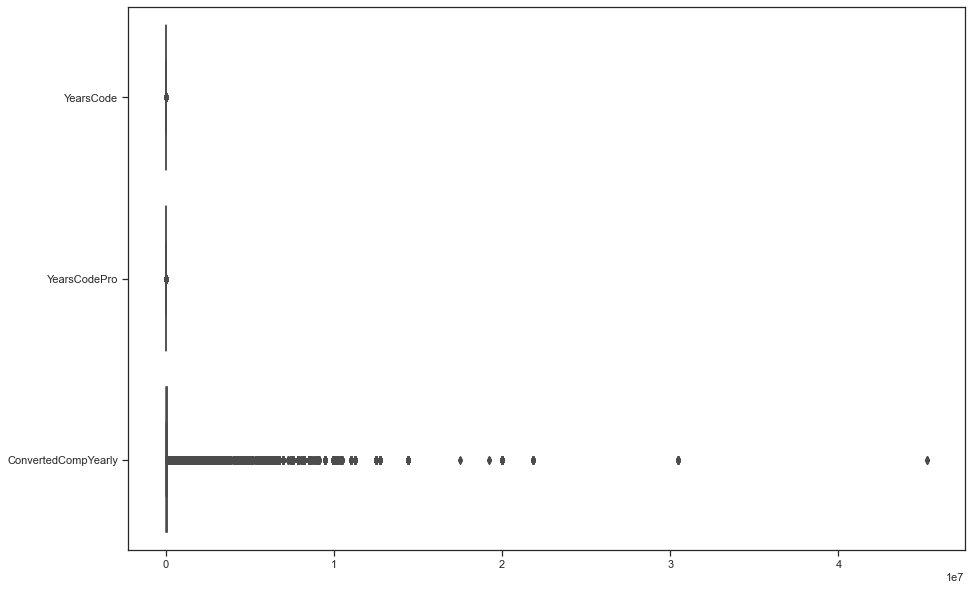

In [77]:
# plot the boxplot to see the outlier of each numerical column
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

### ---------> OBSERVATION
*****
According to plot, the "ConvertedCompYearly" has a lot of considerable outliers. Let's consider

<a id="2.8.2"></a>
## 2.8.2 Dealing with Impossible values & Outliers
***

### ConvertedCompYearly

In [78]:
q_low = df["ConvertedCompYearly"].quantile(0.01)
q_hi  = df["ConvertedCompYearly"].quantile(0.99)

df_filtered = df[(df["ConvertedCompYearly"] > q_hi) | (df["ConvertedCompYearly"] < q_low)]
print("Number of outliers: ", str(len(df_filtered)))
print("Percentage of outliers: ", str(len(df_filtered) / len(df) * 100))

Number of outliers:  80091
Percentage of outliers:  1.8637299731229713


### ---------> OBSERVATION
*****
Since the number of outliers are small so I replace them with mean

In [79]:
df.loc[(df["ConvertedCompYearly"] > q_hi) | (df["ConvertedCompYearly"] < q_low), 'ConvertedCompYearly'] = np.nan
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)

<a id="2.9"></a>
# 📂 2.9 Save the Intermediate data
***
After the cleaning step, all data is saved to a csv file for visualisation step later in dash.

In [80]:
df.to_csv("Data/survey_cleaned.csv", encoding='utf-8')

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Part 2: Stack Overflow EDA</strong></h1>

# It is one the StackOverFlowEDA Notebook